In [1]:
# import pdb; pdb.set_trace()
# import pudb; pudb.set_trace()

# df.style.background_gradient(
#     cmap='coolwarm', 
#     axis=None, 
#     vmin=-1, 
#     vmax=1
# )  # 'Blues', 'coolwarm', 'RdBu_r' & 'BrBG'

# pd.set_option('precision', 2)

# .plot_bokeh(sizing_mode="scale_height")
# .plot_bokeh(kind='hist', bins=1000, sizing_mode="scale_height", xlim=[0, .1])

# Imports

In [23]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 99)

import matplotlib as mpl
from matplotlib import style
style.use('fivethirtyeight')
mpl.rcParams['figure.figsize'] = [20, 7]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import datetime as dt
import pickle
import numpy as np
import pandas as pd
import pandas_bokeh
pandas_bokeh.output_file("/tmp/bokeh_output.html")
import ray

from data_layer import arrow_dataset, storage_adaptor
from tick_filter import streaming_tick_filter
from tick_sampler import streaming_tick_sampler, daily_stats
from workflows import sampler_task, sampler_flow
from utilities import date_fu, project_globals as g
from data_layer import storage_adaptor, fsspec_factory, data_access


config = {
    'meta': {
        'symbol': 'SAND',
        'start_date': '2019-01-01',
        'end_date': '2019-02-01',
        'config_id': 'renko_v1',
    },
    'filter': {
        'mad_value_winlen': 22,
        'mad_deviation_winlen': 1111,
        'mad_k': 17,
        'jma_winlen': 7,
        'jma_power': 2,
    },
    'sampler': {
        'renko_return': 'price_jma_return',
        'renko_size': 0.1,  # for simple runs
        'renko_reveral_multiple': 2,
        'renko_range_frac': 22,
        'renko_range_min_pct_value': 0.03,  # % of symbol value enforced as min renko size
        'max_duration_td': dt.timedelta(minutes=33),
        'min_duration_td': dt.timedelta(seconds=33),
        'min_tick_count': 33,
        'add_label': True,
        'reward_ratios': list(np.arange(2, 11, 0.5)),
    }
}

prefix_1 = f"/tick_samples/{config['meta']['config_id']}/bar_date"

prefix_2 = f"/tick_samples/{config['meta']['config_id']}/bars_df"

prefix_3 = '/data/trades'

In [15]:
data_access.list(prefix='/data/trades', source='local', show_storage=True)

{'size': {'GB': 9.98},
 'symbols': ['FNV',
  'SAND',
  'SA',
  'HMY',
  'EXK',
  'GLD',
  'AU',
  'AG',
  'KGC',
  'SVM',
  'GORO',
  'OR',
  'BTG',
  'RGLD',
  'AUY',
  'SSRM',
  'ASA',
  'NEM',
  'PVG',
  'AXU',
  'AEM',
  'GFI',
  'BVN',
  'KL',
  'NG',
  'FSM',
  'HL',
  'EGO',
  'DRD',
  'WPM',
  'AGI',
  'CDE',
  'MAG',
  'IAG',
  'MUX',
  'GSS',
  'VTI',
  'PAAS',
  'USAS']}

In [5]:
out = data_access.fetch_sd_data('AU', '2020-01-02', '/data/trades')

# Sample tick dates

In [17]:
ray.init(dashboard_port=1111, ignore_reinit_error=True)

2021-05-31 23:04:04,717	INFO services.py:1267 -- View the Ray dashboard at http://127.0.0.1:1111


{'node_ip_address': '192.168.1.66',
 'raylet_ip_address': '192.168.1.66',
 'redis_address': '192.168.1.66:6379',
 'object_store_address': '/tmp/ray/session_2021-05-31_23-04-02_028431_95883/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-05-31_23-04-02_028431_95883/sockets/raylet',
 'webui_url': '127.0.0.1:1111',
 'session_dir': '/tmp/ray/session_2021-05-31_23-04-02_028431_95883',
 'metrics_export_port': 55452,
 'node_id': '0e11fae11dc4874d9a97b2652c0340eaa359bfc41e934417c7517b9d'}

In [ ]:
ray.shutdown()

In [18]:
bar_dates = sampler_flow.run(config, ray_on=True)

22 dates scheduled
(pid=95963) running SAND 2019-01-04
(pid=95961) running SAND 2019-01-07
(pid=95962) running SAND 2019-01-03
(pid=95960) running SAND 2019-01-02
(pid=95960) running SAND 2019-01-08
(pid=95962) running SAND 2019-01-09
(pid=95963) running SAND 2019-01-10
(pid=95961) running SAND 2019-01-11
(pid=95960) running SAND 2019-01-14
(pid=95962) running SAND 2019-01-15
(pid=95963) running SAND 2019-01-17
(pid=95961) running SAND 2019-01-16
(pid=95960) Dropping label, only 0 trades;start at: 2019-01-14 15:59:59.004600-05:00
(pid=95960) running SAND 2019-01-18
(pid=95963) running SAND 2019-01-22
(pid=95961) running SAND 2019-01-23
(pid=95962) running SAND 2019-01-24
(pid=95960) running SAND 2019-01-25
(pid=95961) running SAND 2019-01-28
(pid=95962) running SAND 2019-01-29
(pid=95963) running SAND 2019-01-30
(pid=95962) running SAND 2019-01-31
(pid=95961) running SAND 2019-02-01


<AxesSubplot:>

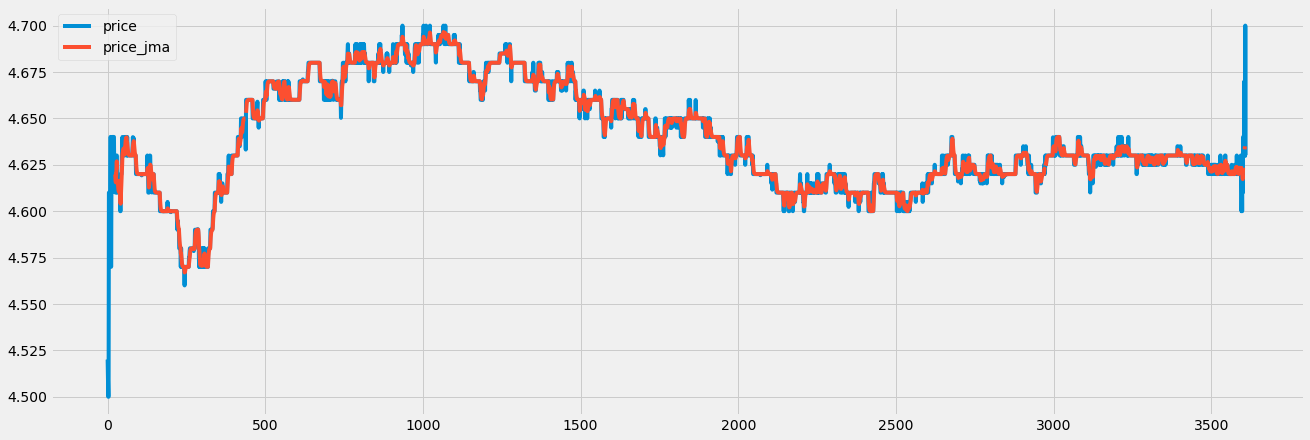

In [24]:
n = 0

# bar_dates[n]['ticks_df'][['price', 'price_jma']].plot_bokeh(sizing_mode="scale_height")
bar_dates[n]['ticks_df'][['price', 'price_jma']].plot()

<AxesSubplot:>

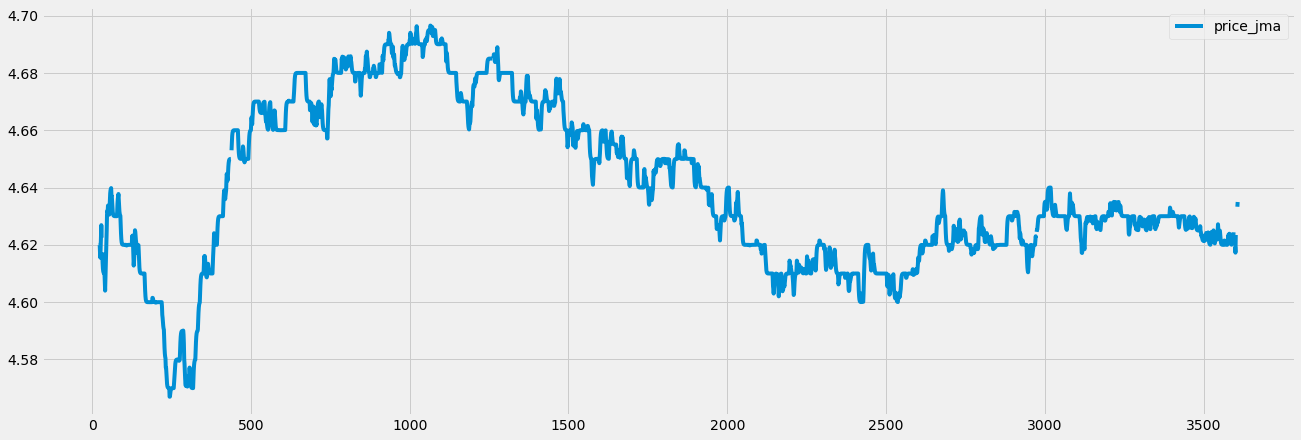

In [25]:
bar_dates[n]['ticks_df'][['price_jma']].plot()

In [26]:
bar_dates[n]['ticks_df'].status.value_counts() / len(bar_dates[n]['ticks_df'])

clean: market-open              0.987545
filtered: irregular condition   0.004705
filtered: mad_warmup            0.004152
clean: after-hours              0.001937
filtered: zero volume           0.000830
filtered: mad_outlier           0.000554
filtered: ts diff               0.000277
Name: status, dtype: float64

<AxesSubplot:>

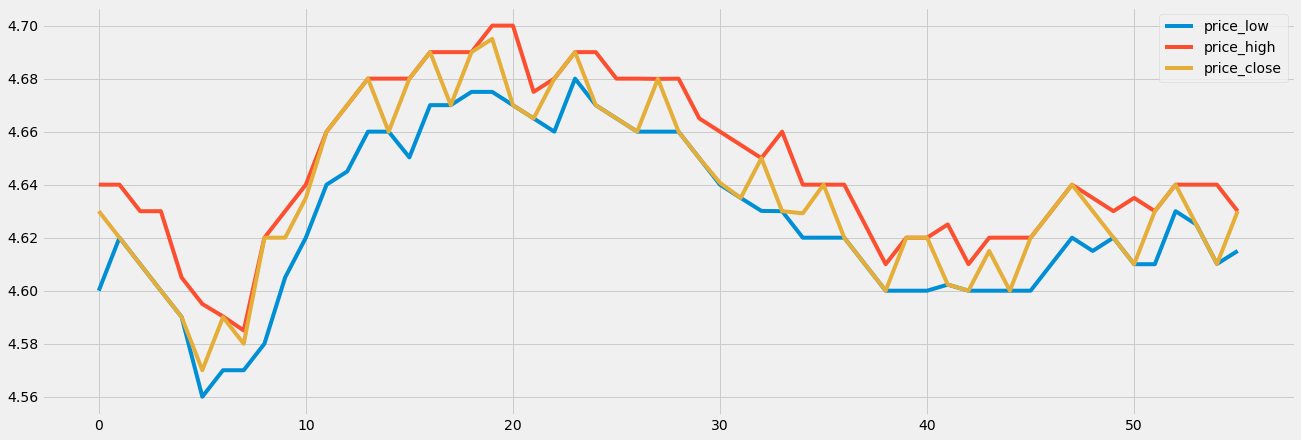

In [27]:
bar_dates[n]['bars_df'][['price_low', 'price_high', 'price_close']].plot()

In [31]:
from sample_features import stacked
# fill daily gaps
stacked_df = stacked.fill_gaps_dates(bar_dates, fill_col='price_vwap')

stacked_df[['price_high','price_low','price_close', 'price_vwap']].plot_bokeh(sizing_mode="scale_height")

# stacked stats
stats_df = stacked.stacked_df_stats(stacked_df)

stats_df.describe()

'thresh'
gap fill failed:  2019-01-03
'thresh'
gap fill failed:  2019-01-04
'thresh'
gap fill failed:  2019-01-07
'thresh'
gap fill failed:  2019-01-08
'thresh'
gap fill failed:  2019-01-09
'thresh'
gap fill failed:  2019-01-10
'thresh'
gap fill failed:  2019-01-11
'thresh'
gap fill failed:  2019-01-14
'thresh'
gap fill failed:  2019-01-15
'thresh'
gap fill failed:  2019-01-16
'thresh'
gap fill failed:  2019-01-17
'thresh'
gap fill failed:  2019-01-18
'thresh'
gap fill failed:  2019-01-22
'thresh'
gap fill failed:  2019-01-23
'thresh'
gap fill failed:  2019-01-24
'thresh'
gap fill failed:  2019-01-25
'thresh'
gap fill failed:  2019-01-28
'thresh'
gap fill failed:  2019-01-29
'thresh'
gap fill failed:  2019-01-30
'thresh'
gap fill failed:  2019-01-31
'thresh'
gap fill failed:  2019-02-01


,bar_count,duration_min_median,price_range_mean
count,22.000000,22.000000,22.000000
mean,54.818182,5.448485,0.019388
std,14.046306,2.508821,0.001549
min,27.000000,2.766667,0.016597
25%,48.750000,3.816667,0.018441
50%,56.000000,5.170833,0.019065
75%,62.250000,5.481250,0.020493
max,81.000000,12.166667,0.023104
